In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("D:\\Data Analytics\\End-to-end projects\\Progress\\AgroYield Insights_Data-Driven Crop Production and Profitability Analysis\\Data\\crop_yield.csv")
df.head()



,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,52.380517
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [31]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,5.127324
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,16.783666
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.387143
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,989.870000


In [32]:
# Check MISSING values
df.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [33]:
# Check Duplicate values
df.duplicated().sum()

0

In [44]:
df.isnull().sum()

Crop                 0
Crop_Year            0
Season               0
State                0
Area                 0
Production         112
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield              112
dtype: int64

In [35]:
import numpy as np
cols_to_fix = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

df.isnull().sum()

Crop                 0
Crop_Year            0
Season               0
State                0
Area                 0
Production         112
Annual_Rainfall      0
Fertilizer           0
Pesticide            0
Yield              112
dtype: int64

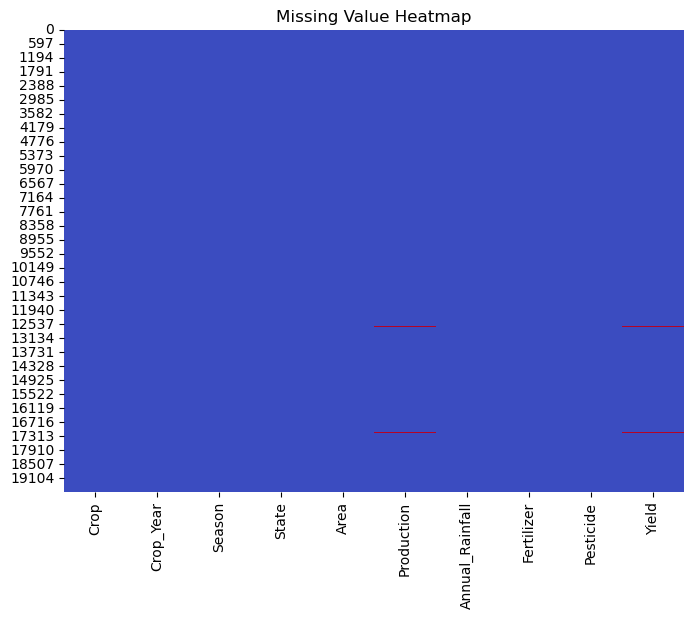

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Value Heatmap")
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Rows without missing 'Production'
df_train_prod = df[df['Production'].notna()]
# Rows with missing 'Production'
df_pred_prod = df[df['Production'].isna()]

X_train_prod = df_train_prod.drop(columns=['Production', 'Yield'])
y_train_prod = df_train_prod['Production']

# Encode categorical features
X_train_prod = pd.get_dummies(X_train_prod, drop_first=True)

model_prod = RandomForestRegressor(random_state=42, n_estimators=200)
model_prod.fit(X_train_prod, y_train_prod)


# Prepare same structure for prediction
X_pred_prod = pd.get_dummies(df_pred_prod.drop(columns=['Production', 'Yield']), drop_first=True)
X_pred_prod = X_pred_prod.reindex(columns=X_train_prod.columns, fill_value=0)

# Predict
pred_prod = model_prod.predict(X_pred_prod)

# Fill predicted values
df.loc[df['Production'].isna(), 'Production'] = pred_prod

print("✅ Missing Production values imputed successfully!")


✅ Missing Production values imputed successfully!


In [48]:
df_train_yield = df[df['Yield'].notna()]
df_pred_yield = df[df['Yield'].isna()]

X_train_yield = df_train_yield.drop(columns=['Yield'])
y_train_yield = df_train_yield['Yield']

# Encode
X_train_yield = pd.get_dummies(X_train_yield, drop_first=True)
model_yield = RandomForestRegressor(random_state=42, n_estimators=200)
model_yield.fit(X_train_yield, y_train_yield)

X_pred_yield = pd.get_dummies(df_pred_yield.drop(columns=['Yield']), drop_first=True)
X_pred_yield = X_pred_yield.reindex(columns=X_train_yield.columns, fill_value=0)

pred_yield = model_yield.predict(X_pred_yield)
df.loc[df['Yield'].isna(), 'Yield'] = pred_yield

print("✅ Missing Yield values imputed successfully!")


✅ Missing Yield values imputed successfully!


In [49]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [7]:
# Save the cleaned data to a new Excel file
# cleaned_file_path = '/content/Cleaned_crop_yield.csv'
# df.to_csv(cleaned_file_path, index=False)

## EDA(Exploratory Data Analysis)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Descriptive statistics for numerical columns
print(df.describe())

# Summary for categorical columns
print(df.describe(include=['object']))

          Crop_Year          Area    Production  Annual_Rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643979e+07      1437.755177   
std        6.498099  7.328287e+05  2.630567e+08       816.909589   
min     1997.000000  5.000000e-01  1.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.400000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.385300e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.232000e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         Fertilizer     Pesticide         Yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04      5.190627  
std    9.494600e+07  2.132874e+05     16.943713  
min    5.417000e+01  9.000000e-02      0.003571  
25%    1.880146e+05  3.567000e+02      0.605000  
50%    1.234957e+06  2.421900e+03      1.038519  
75%    1.000385e+07  2.004170e+04    

In [52]:
df['Production_per_Hect'] = df['Production'] / df['Area']
df['Fertilizer_per_Hect'] = df['Fertilizer'] / df['Area']
df['Pesticide_per_Hect'] = df['Pesticide'] / df['Area']
df['Yield_per_Hect'] = df['Pesticide'] / df['Area']

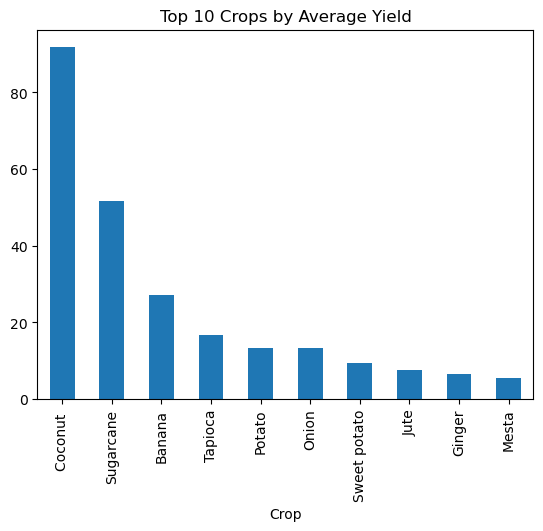

In [53]:
# Top 10 crops by average yield
top_crops = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False).head(10)
top_crops.plot(kind='bar', title='Top 10 Crops by Average Yield')
plt.show()

# print(df.groupby('Crop')['Yield'].mean().sort_values(ascending=False))

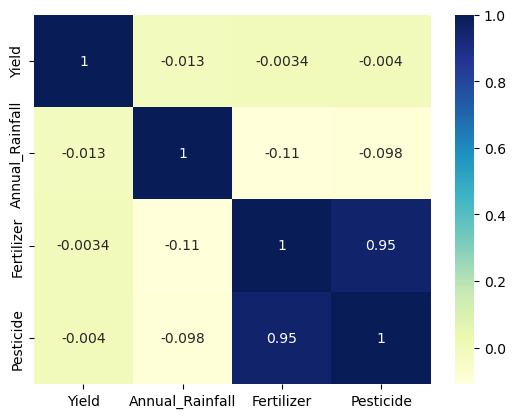

In [54]:
sns.heatmap(df[['Yield','Annual_Rainfall','Fertilizer','Pesticide']].corr(), annot=True, cmap='YlGnBu')
plt.show()

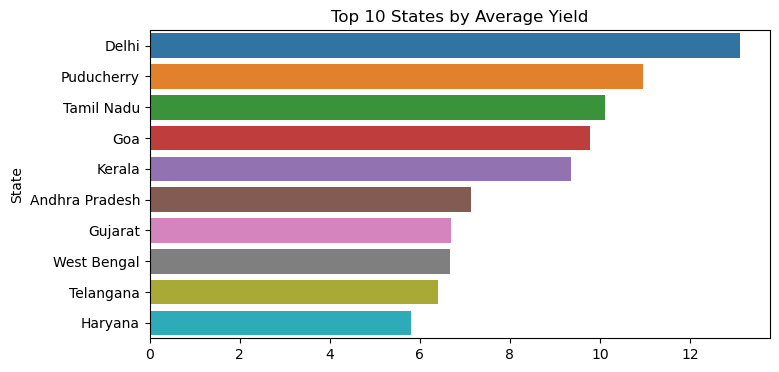

In [55]:
state_yield = df.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10)
season_yield = df.groupby('Season')['Yield'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=state_yield.values, y=state_yield.index)
plt.title("Top 10 States by Average Yield")
plt.show()

In [56]:
# Save the cleaned data to a new Excel file
# cleaned_file_path = '/content/Cleaned_crop_yield.csv'
# df.to_csv(cleaned_file_path, index=False)

In [57]:
import pyodbc
from sqlalchemy import create_engine, text

# # 1️⃣ Load your CSV file
# dff = pd.read_csv("C:\\Users\\lenovo\\Data Analytics\\Heart Disease Risk Prediction and Analysis\\Data\\heart_disease_cleaned.csv")

# # 2️⃣ SQL Server connection parameters
server = 'localhost'            # your SQL Server instance name
database = 'AgroYield_DB'      # your database name
driver = 'ODBC Driver 18 for SQL Server'

# # 3️⃣ Create SQLAlchemy connection string
connection_string = f"mssql+pyodbc://@{server}/{database}?driver={driver.replace(' ', '+')}&Trusted_Connection=yes&Encrypt=no"
engine = create_engine(connection_string)

# # 4️⃣ Define your table schema (optional)
# # Automatically creates the table structure from DataFrame

table_name = 'Crop_Yield'

# # 5️⃣ Push data to SQL Server
df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"✅ Data successfully inserted into table '{table_name}' in database '{database}'.")


✅ Data successfully inserted into table 'Crop_Yield' in database 'AgroYield_DB'.


In [58]:
with engine.connect() as conn:
    result = conn.execute(text(f"SELECT TOP 5 * FROM {table_name}"))
    for row in result:
        print(row)

('Arecanut', 1997, 'Whole Year ', 'Assam', 73814.0, 56708.0, 2051.4, 7024878.38, 22882.34, 0.796086957, 0.7682553445145908, 95.17, 0.31, 0.31)
('Arhar/Tur', 1997, 'Kharif     ', 'Assam', 6637.0, 4685.0, 2051.4, 631643.29, 2057.47, 0.710434783, 0.7058912159108031, 95.17, 0.30999999999999994, 0.30999999999999994)
('Castor seed', 1997, 'Kharif     ', 'Assam', 796.0, 22.0, 2051.4, 75755.32, 246.76, 0.238333333, 0.02763819095477387, 95.17, 0.31, 0.31)
('Coconut ', 1997, 'Whole Year ', 'Assam', 19656.0, 126905000.0, 2051.4, 1870661.52, 6093.36, 52.38051739, 6456.2983312983315, 95.17, 0.31, 0.31)
('Cotton(lint)', 1997, 'Kharif     ', 'Assam', 1739.0, 794.0, 2051.4, 165500.63, 539.09, 0.420909091, 0.4565842438182864, 95.17, 0.31, 0.31)


In [ ]:
# Save the cleaned data to a new Excel file
# cleaned_file_path = '/content/Cleaned_crop_yield.csv'
# df.to_csv(cleaned_file_path, index=False)